# Ultimate Pig Solitaire: A Data Driven Extravaganza

## The Rules of Pig Solitaire
In 7 turns, you are attempting to get the highest score possible.

Each turn, you have two choices:

Roll. Roll a six-sided die. If it comes up one, your turn is over and you add nothing to your score. If it comes up two through six, you add that number to your turn total and choose again.

Hold. If you hold, you add the turn total to your score.

Every turn, you will always roll first, else you will have no turn total to add to your score.

### Import the libraries necessary for fun software and interesting graphs.

In [1]:
%matplotlib inline
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

## Classes
The Player class is the parent class in Ultimate Pig Solitaire. It has two attributes and one method.
self.total keeps track of how points the player has throughout the game. self.last_roll retains the value of the last die roll, to aid subclasses in determining whether to roll again. is_roll_again() is effectively a stub that must be overloaded by future subclasses. In the parent class, it votes against rolling again every time.

In [2]:
class Player:
    def __init__(self):
        self.total = 0
        self.last_roll = 0

    def is_roll_again(self, turn):
        return False

EagerPlayer is a subclass of Player. It implements the logic in is_roll again as a ratio of self.total to the number of turns the EagerPlayer has played. The data will show that this is the most successful player class.

In [11]:
class EagerPlayer(Player):
    def is_roll_again(self, turn):
        if self.last_roll == 1:
            return False
        elif turn == 0 or self.total < 10:
            return True
        elif self.total / turn < 15:
            return True
        else:
            return False

ArbitraryPlayer is precisely that. It choses to roll or hold at random.

In [4]:
class ArbitraryPlayer(Player):
    def is_roll_again(self, turn):
        if self.last_roll == 1:
            return False
        else:
            return random.choice([True, False])

OverlyCautiousPlayer is an attempt to reverse the logic found in EagerPlayer. However, this class does not seem to be cautious enough. This is the second best player class.

In [5]:
class OverlyCautiousPlayer(Player):
    def is_roll_again(self, turn):
        if self.last_roll == 1:
            return False
        elif turn == 0 or self.total < 4:
            return True
        elif self.total / turn > 4:
            return False
        else:
            return True

The following three functions implement the game. A player has 7 turns. A player will roll and then choose whether to roll again in the turn. is_roll_again does the roll logic as well as check for 1s thrown on the previous roll.

In [7]:
def roll_die():
    return random.randint(1, 6)


def play(player):
    total = player.total
    roll = roll_die()
    player.last_roll = roll
    if roll == 1:
        return total
    else:
        total += roll
        return total


def game_loop(player):
    result = 0
    for turn in range(7):
        result = play(player)
        player.total = result
        while player.is_roll_again(turn):
            result = play(player)
            player.total = result
    return player.total

The final code block runs the game with each player class for 1000 trials and provides statistics and graphs detailing the results of the trials.

Player Mean:  23.24
Player Median:  23.0
Player StDev:  5.308161317874258


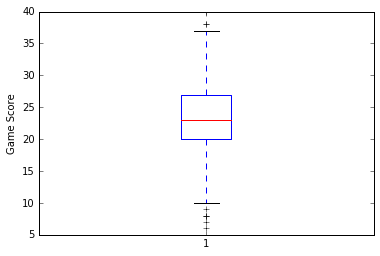

Eager Player Mean:  79.471
Eager Player Median:  83.0
Eager Player StDev:  15.688189133175259


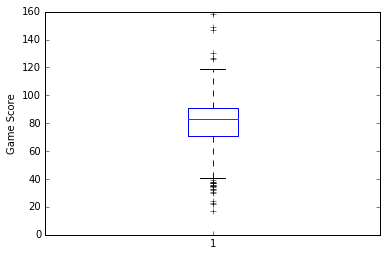

Arbitrary Player Mean:  40.025
Arbitrary Player Median:  39.0
Arbitrary Player StDev:  13.419853481594627


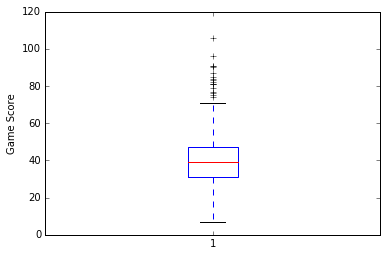

Overly Cautious Player Mean:  41.365
Overly Cautious Player Median:  33.0
Overly Cautious Player StDev:  20.52015720826358


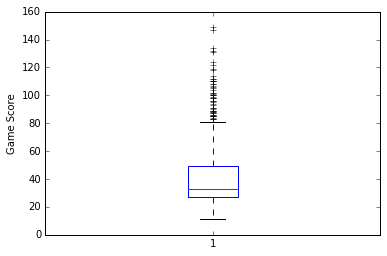

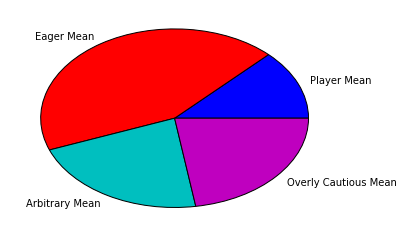

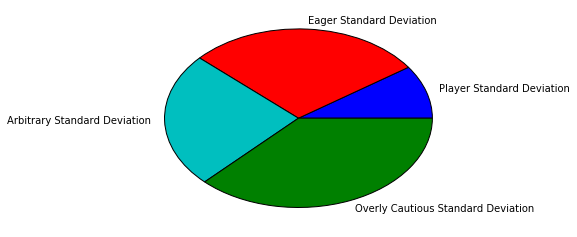

In [26]:
trials = 1000
player_class_trials = []
for _ in range(trials):
    bob = Player()
    player_class_trials.append(game_loop(bob))

player_mean = st.mean(player_class_trials)
player_median = st.median(player_class_trials)
player_stdev = st.stdev(player_class_trials)
print("Player Mean: ", player_mean)
print("Player Median: ", player_median)
print("Player StDev: ", player_stdev)


plt.figure(1)
plt.boxplot(player_class_trials)
plt.ylabel('Game Score')
plt.show()


eager_player_trials = []
for _ in range(trials):
    sally = EagerPlayer()
    eager_player_trials.append(game_loop(sally))

eager_mean = st.mean(eager_player_trials)
eager_median = st.median(eager_player_trials)
eager_stdev = st.stdev(eager_player_trials)
print("Eager Player Mean: ", eager_mean)
print("Eager Player Median: ", eager_median)
print("Eager Player StDev: ", eager_stdev)


plt.figure(2)
plt.boxplot(eager_player_trials)
plt.ylabel('Game Score')
plt.show()


arbitrary_player_trials = []
for _ in range(trials):
    june = ArbitraryPlayer()
    arbitrary_player_trials.append(game_loop(june))

arbitrary_mean = st.mean(arbitrary_player_trials)
arbitrary_median = st.median(arbitrary_player_trials)
arbitrary_stdev = st.stdev(arbitrary_player_trials)   
print("Arbitrary Player Mean: ", arbitrary_mean)
print("Arbitrary Player Median: ", arbitrary_median)
print("Arbitrary Player StDev: ", arbitrary_stdev)


plt.figure(3)
plt.boxplot(arbitrary_player_trials)
plt.ylabel('Game Score')
plt.show()


overly_cautious_trials = []
for _ in range(trials):
    melvin = OverlyCautiousPlayer()
    overly_cautious_trials.append(game_loop(melvin))

overly_cautious_mean = st.mean(overly_cautious_trials)
overly_cautious_median = st.median(overly_cautious_trials)
overly_cautious_stdev = st.stdev(overly_cautious_trials)
print("Overly Cautious Player Mean: ", overly_cautious_mean)
print("Overly Cautious Player Median: ", overly_cautious_median)
print("Overly Cautious Player StDev: ", overly_cautious_stdev)

plt.figure(4)
plt.boxplot(overly_cautious_trials)
plt.ylabel('Game Score')
plt.show()

plt.figure(5)
plt.pie([player_mean, eager_mean, arbitrary_mean, overly_cautious_mean], labels=['Player Mean', 'Eager Mean', 'Arbitrary Mean', 'Overly Cautious Mean'], colors=('b', 'r', 'c', 'm'))
plt.show()

plt.figure(6)
plt.pie([player_stdev, eager_stdev, arbitrary_stdev, overly_cautious_stdev], labels=['Player Standard Deviation', 'Eager Standard Deviation', 'Arbitrary Standard Deviation', 'Overly Cautious Standard Deviation'], colors=('b', 'r', 'c', 'g'))
plt.show()

## Results
What can we interpret from these outcomes?

The EagerPlayer is clearly the best player class on *average* at mean 79.50. However, the EagerPlayer may not be the best choice for someone risk averse as it has the second highest standard deviation (15.69) among the four classes.

It does not pay to be too risk averse, however, as the worst performing class (mean 23.24) in the bunch (the parent Player) rated the smallest standard deviation at 5.31